This step is to run logistic regression model.

# Import modules

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Exploratory analysis on the new data set

In [2]:
reg_df=pd.read_csv('reg_df.csv',index_col=0)

In [3]:
reg_df.head()

,hospital_death,age,fac_surgery,fac_apache,fac_d1_h1,fac_calcium,fac_albumin
0,0,68.0,-0.510279,-0.476342,1.999844,-0.502944,-0.510279
1,0,77.0,-0.508546,-0.468595,1.999702,-0.501839,-0.520722
2,0,25.0,-0.507723,-0.478581,1.999878,-0.506517,-0.507057
3,0,81.0,-0.507536,-0.479875,1.999892,-0.505867,-0.506614
4,0,19.0,-0.506768,-0.481848,1.999912,-0.505325,-0.505971


In [4]:
reg_df.info(verbose=True, null_counts=True) #to see length and dtypes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91713 entries, 0 to 91712
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   hospital_death  91713 non-null  int64  
 1   age             91713 non-null  float64
 2   fac_surgery     91713 non-null  float64
 3   fac_apache      91713 non-null  float64
 4   fac_d1_h1       91713 non-null  float64
 5   fac_calcium     91713 non-null  float64
 6   fac_albumin     91713 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 5.6 MB


In [5]:
reg_df.describe()

,hospital_death,age,fac_surgery,fac_apache,fac_d1_h1,fac_calcium,fac_albumin
count,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000
mean,0.086302,62.309516,-0.507236,-0.480094,1.999205,-0.505549,-0.506326
std,0.280811,16.383883,0.012858,0.019927,0.050661,0.012868,0.012746
min,0.000000,16.000000,-1.111907,-0.562180,-1.999987,-0.630196,-0.762244
25%,0.000000,53.000000,-0.508938,-0.486066,1.999842,-0.507534,-0.508054
50%,0.000000,64.000000,-0.506660,-0.481877,1.999911,-0.505565,-0.505910
75%,0.000000,75.000000,-0.505088,-0.475889,1.999947,-0.503963,-0.504398
max,1.000000,89.000000,0.497714,1.619016,2.000000,0.497714,0.506846


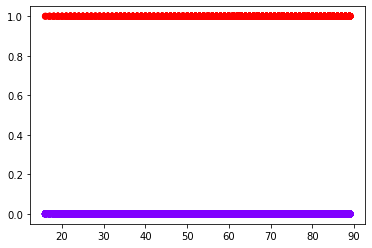

In [6]:
plt.scatter(reg_df.iloc[:,1],reg_df['hospital_death'],c = reg_df['hospital_death'], cmap='rainbow')
plt.show()

# Logistic regression model

In [7]:
def logi_confmatrix(df, dependent_var):
    '''split data set, 
    run logistic regression model, 
    show coeficient & intercept in the predictive model,
    and finally displace confusion matrix.'''
    #split data
    y=df[dependent_var]
    x=df.iloc[:,1:]
    x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=1)
    #logistic regression model
    log_reg = LogisticRegression()
    lr=log_reg.fit(x_train,y_train)
    #show Coeficient and Intercept
    print('The coeficient for predictive model is:')
    print(lr.coef_)
    print('                           ')
    print('The intercept for predictive model is:')
    print(lr.intercept_)
    #prediction
    y_pred = lr.predict(x_test)
    #displace confusion matrix
    print('                           ')
    print('In the confusion matrix:')
    print(confusion_matrix(y_test, y_pred))
    print('It is concluded that:')
    print('True - positive: '+ str(confusion_matrix(y_test, y_pred)[0][0])+' (upper-left) number of survivals is predicted correctly;')
    print('True - negative: '+ str(confusion_matrix(y_test, y_pred)[0][1])+' (lower-right) number of deaths is predicted correctly;')
    print('False - positive: '+ str(confusion_matrix(y_test, y_pred)[1][0])+' (top-right) number of survivals is predicted wrongly;')
    print('False - negative: '+ str(confusion_matrix(y_test, y_pred)[1][1])+' (lower-left) number of deaths is predicted wrongly.')
    print('                           ')
    print('sensitivity = true positive/(true positive + false negative) = ' + str(round(confusion_matrix(y_test, y_pred)[0][0]/(confusion_matrix(y_test, y_pred)[0][0]+confusion_matrix(y_test, y_pred)[1][1])*100,2))+'%')
    print('specificity = true negative/(true negative + false positive) = ' + str(round(confusion_matrix(y_test, y_pred)[0][1]/(confusion_matrix(y_test, y_pred)[0][1]+confusion_matrix(y_test, y_pred)[1][0])*100,2))+'%')
    

In [8]:
logi_confmatrix(reg_df, 'hospital_death')

The coeficient for predictive model is:
[[ 0.02639175 -0.19811095 -3.75239716  0.94315099  2.49518734  0.51216978]]
                           
The intercept for predictive model is:
[-6.35089063]
                           
In the confusion matrix:
[[20922     0]
 [ 2007     0]]
It is concluded that:
True - positive: 20922 (upper-left) number of survivals is predicted correctly;
True - negative: 0 (lower-right) number of deaths is predicted correctly;
False - positive: 2007 (top-right) number of survivals is predicted wrongly;
False - negative: 0 (lower-left) number of deaths is predicted wrongly.
                           
sensitivity = true positive/(true positive + false negative) = 100.0%
specificity = true negative/(true negative + false positive) = 0.0%


Therefore, this imbalanced data set causes the correct prediction of suvivals only. 

Resampling will be considered. 

# Resampling - oversampling

In [9]:
# Replicate samples from minority class for 10 times
add_df = reg_df[reg_df['hospital_death'] ==1]
for col in range(1,10):
    add_df=add_df.append(reg_df[reg_df['hospital_death'] ==1],ignore_index=False)

reg_resampled_df=reg_df.append(add_df,ignore_index=True)
reg_resampled_df

,hospital_death,age,fac_surgery,fac_apache,fac_d1_h1,fac_calcium,fac_albumin
0,0,68.000000,-0.510279,-0.476342,1.999844,-0.502944,-0.510279
1,0,77.000000,-0.508546,-0.468595,1.999702,-0.501839,-0.520722
2,0,25.000000,-0.507723,-0.478581,1.999878,-0.506517,-0.507057
3,0,81.000000,-0.507536,-0.479875,1.999892,-0.505867,-0.506614
4,0,19.000000,-0.506768,-0.481848,1.999912,-0.505325,-0.505971
...,...,...,...,...,...,...,...
170858,1,19.000000,-0.510002,-0.474757,1.999830,-0.506800,-0.508271
170859,1,74.000000,-0.508058,-0.481055,1.999902,-0.507356,-0.503433
170860,1,62.309516,-0.506097,-0.482415,1.999918,-0.506097,-0.505308
170861,1,59.000000,-0.497610,-0.497610,1.999986,-0.497610,-0.507155


# Logistic regression model on resampled data set

In [10]:
logi_confmatrix(reg_resampled_df, 'hospital_death')

The coeficient for predictive model is:
[[ 0.02724559 -0.7792873  -6.51853597  0.17969166  5.93295892  1.1851727 ]]
                           
The intercept for predictive model is:
[-2.02328737]
                           
In the confusion matrix:
[[10710 10361]
 [ 7545 14100]]
It is concluded that:
True - positive: 10710 (upper-left) number of survivals is predicted correctly;
True - negative: 10361 (lower-right) number of deaths is predicted correctly;
False - positive: 7545 (top-right) number of survivals is predicted wrongly;
False - negative: 14100 (lower-left) number of deaths is predicted wrongly.
                           
sensitivity = true positive/(true positive + false negative) = 43.17%
specificity = true negative/(true negative + false positive) = 57.86%


The sensitivity of resampled logistic regression model reduces compared to the original model, though specificity improves.

In total,

logistic regression model is underfitting thus unsuitable for survival rate prediction in the test data set. 

A non-linear model is to be considered. 